<center>
<span style="line-height:32px;display:block;font-size:32px;font-weight:bolder;">Cardiovascular Study Dataset</span>
<span style="line-height:32px;display:block;font-size:14px;font-weight:bold;color:gray;">Predicting Heart Disease of Patients</span>
<br>
<br>    
<img src="./images/image-01.jpg?1" />
<br>
<br>
<span style="line-height:32px;display:block;font-size:16px;font-weight:bold;">University of Catania - Master Degree in Data Science</span>
<span style="line-height:32px;display:block;font-size:16px;font-weight:bold;">Academic year 2020/2021</h3>
<span style="line-height:32px;display:block;font-size:16px;font-weight:bold;">Project notebook or Fondamenti di Analisi Data</span>
<br>
<br>
<br>
<span style="line-height:32px;display:block;font-size:16px;font-weight:bold;">Marco Cavalli - 1000024189</span>
<span style="line-height:32px;display:block;font-size:16px;font-weight:bold;">Teachers: G. Gallo - P. Riela</span>
</center>

In [61]:
%%javascript
$.getScript('scripts/table_of_contents.js')
//This cell is needed only to creat§ the table of contents

<IPython.core.display.Javascript object>

<p style="line-height:32px;display:block;font-size:32px;font-weight:bolder;" id="toctitle">Table of Contents</p>
<div id="toc"></div>

<h1>1 Introduction</h1>

<h2>1.1 Purposes</h2>

<p>World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications.</p>

<p>This notebook main purpose was to study the Framingham Heart dataset. The research on this dataset was organized in these three main sections:</p>

<ol>
    <li>Section one: Data Analysis and Data Refactor</li>
    <li>Section two: Descriptive statistics on the data</li>
    <li>Section three: Classification</li>
</ol>

<h2>1.2 About the dataset</h2>

<p>The dataset is publically available on the Kaggle <a href="https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset">website</a>. It contains the data of over 4000 residents of the town of Framingham, Massachusetts. The meaning of this dataset is to determine if the patients will suffer at least a CHD (coronary heart disease) or not in ten years.</p>

<p>To able to reach this goal, for each person they gave fifteen attributes divided in three groups: demographic, medical history of the patient and his or her current medical status (such as BMI, heart rate etc). Each attribute is a potential risk factor to determine if the patient will suffer a CHD in ten years.</p>

<p>It follows now the list of the attributes:</p>

<ol>
    <li>Demographic
        <ul>
            <li>sex: male (value 1) or female (value 0)</li>
            <li>age: Number of years as an integer number</li>
            <li>education: Some High School (value 1); High School Degree or GED (value 2); Some College or Vocational School (value 3); College Degree or Vocational School Degree (value4)</li>
            <li>currentSmoker: Smoker (1) or Nonsmoker (0)</li>
            <li>cigsPerDay: Average number of cigarettes smoked per day as an integer (0 for nonsmokers)</li>
        </ul>
    </li>
    <li>Medical History of the patient
        <ul>
            <li>BPMeds: Whether the patient is on Blood Pressure medications (value 1) or not (value 0)</li>
            <li>prevalentStroke: Whether the patient already had at least a stroke (value 1) or not (value 0)</li>
            <li>prevalentHyp: Whether the patient is hypertensive (value 1) or not (value 0)</li>
            <li>diabetes: Whether the patient has diabetes (value 1) or not (value 0)</li>
        </ul>
    </li>
    <li>Current Medical Status of the patient
        <ul>
            <li>totChol: Float number of the cholesterol measured as mg/dL</li>
            <li>sysBP: Float number of the systolic blood pressure measured as mmHg</li>
            <li>diaBP: Float number of the diastolic blood pressure measured as mmHg</li>
            <li>BMI: Body Mass Index (weight/height$^{2}$) of the patient measured as kg/mt$^{2}$. It is a float number</li>
            <li>heartRate: Beats/Minute. It is an integer number</li>
            <li>glucose: Float number of the quantity of glucose in the patient's blood. Measured as mg/dL</li>
        </ul>
    </li>
</ol>


<p>As we said, this dataset is labeled. The column's name is TenYearCHD. There can be two possibilities:</p>

<ol>
    <li>Label 0: The patient won't have a CHD disease in 10 years.</li>
    <li>Label 1: The patient will have at laest one CHD disease in 10 years.</li>
</ol>

<h2>1.3 Descriptions of the job-phases</h2>

<h1>2 Requirements</h1>

<h2>2.1 Python modules</h2>

<p>To be able to run this code you will need to have the following modules:</p>

<ol>
    <li>numpy</li>
    <li>pandas</li>
    <li>matplotlib</li>
</ol>

<p>To install them you can either use the conda install command or pip.</p>

In [60]:
%%bash


conda install -c anaconda numpy pandas matplotlib scipy

Solving environment: ...working... done

# All requested packages already installed.



<p>This is the command to run if you want to use pip.</p>

In [8]:
%%bash

pip install numpy pandas matplotlib

<h2>2.2 Download the dataset</h2>

<p>The dataset is inside the "./dataset" folder so it is not needed to download it. Anyway, if it would get any updates (it is unlikely since last update was 4 years ago) it is possible to retrieve it from this <a hred="https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset/download">link</a>.</p>

<h2>2.3 Import all the libraries</h2>

<p>To avoid importing many time the same libraries, it is suggested to load all of them at once before going any further with the report.</p>

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt


<h1>3 Data Analysis and Data Refactor</h1>

<h2>3.1 Load the dataset</h2>

<p>As first thing it is needed to load the dataset. Using the "info" method it is possible to have a look at the big picture and to understand a little bit more the data in the dataset.</p>

In [2]:
framingham=pd.read_csv('dataset/framingham.csv')

<h2>3.2 Data quality assessment</h2>

In [3]:
framingham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


<p>The first column is called "male". It would be less confusing to call it "sex". Since it is probably better to still using numbers instead of words as values for this column, it will keep the same logic as discussed in section 1.2 About the dataset: 0 for females and 1 for males.</p>

<p>It follows the operations block meant to change the name of the column "male" in "sex".</p>

In [4]:
framingham.columns = [col if col != 'male' else 'sex' for col in framingham]

<p><b>QUESTION: Are four classes for education really needed?</b></p>

<p>It it not needed to have four classes for education because three of them would be enough for this case. The reason about this conclusion is that class 2 and class 3 are redundant. For the records, class 2 means that the patient has an High School degree, meanwhile class 3 means that the patient tried to get a college degree, but he or she finally hasn't get it yet. So, class 2 and class 3 are grouped together in class 2 and class 4 (which is patients with a college degree) is relabeled as class 3.</p>

In [5]:
framingham['education'] = framingham['education'].fillna(1)
framingham['education'] = framingham['education'].replace({3:2})
framingham['education'] = framingham['education'].replace({4:3})
framingham['education'].describe()

count    4240.000000
mean        1.681132
std         0.663633
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: education, dtype: float64

<p><b>QUESTION: What to do with NaN values?</b></p>

<p>The biggest problem is related with the NaN values of the column "glucose" because it is an important value. The easiest thing to do would be to use the mean value, but it is possible to find a way to get these values with linear regretion. Given the fact that the "glucose" columns holds a very important data and that 400 records almost 8%/10% of the number of the records, it is probably a good idea to just drop the records with NaN values.</p>

<p>Lastly, six columns with NaN values remains, but the total number of records with NaN values are not so many. The strategy to adopt for these columns is the following:</p>

<ul>
    <li>For education, NaN values are replaced with "1" which is the lowest value/class</li>
    <li>For cigsPerDay, NaN values are replaced with "0" if the patient is not a smoker, or the mean value if he or she is a smoker</li>
    <li>For BPMeds/totChol/BMI/heartRate it will be the mean value</li>
</ul>

In [6]:
framingham['BPMeds'] = framingham['BPMeds'].fillna(-1)
framingham['totChol'] = framingham['totChol'].fillna(-1)
framingham['BMI'] = framingham['BMI'].fillna(-1)
framingham['heartRate'] = framingham['heartRate'].fillna(-1)
framingham['BPMeds'] = framingham['BPMeds'].replace({-1:2})
framingham['totChol'] = framingham['totChol'].replace({-1:2})
framingham['BMI'] = framingham['BMI'].replace({-1:2})
framingham['heartRate'] = framingham['heartRate'].replace({-1:2})

In [7]:
framingham = framingham.dropna()

<h1>4 Descriptive statistics on the data</h1>

<h2>4.1 Data distribution</h2>

In [8]:
framingham.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3827 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3827 non-null   int64  
 1   age              3827 non-null   int64  
 2   education        3827 non-null   float64
 3   currentSmoker    3827 non-null   int64  
 4   cigsPerDay       3827 non-null   float64
 5   BPMeds           3827 non-null   float64
 6   prevalentStroke  3827 non-null   int64  
 7   prevalentHyp     3827 non-null   int64  
 8   diabetes         3827 non-null   int64  
 9   totChol          3827 non-null   float64
 10  sysBP            3827 non-null   float64
 11  diaBP            3827 non-null   float64
 12  BMI              3827 non-null   float64
 13  heartRate        3827 non-null   float64
 14  glucose          3827 non-null   float64
 15  TenYearCHD       3827 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 508.3 KB


<p>After filling/dropping NaN values, the dataset lost around 500 records. It is still acceptable, and it will be proved later on.</p>

<h3>4.1.1 CHD in 10 years</h3>

<p>This is a dataset created to perform classification tasks. The column which holds the labels is "TenYearCHD" which means if the patient will suffer a CHD in ten years.</p>

<p>In this section it will be given an answer to the following question:</p>

<ul>
    <li>Is the dataset balanced?</li>
</ul>

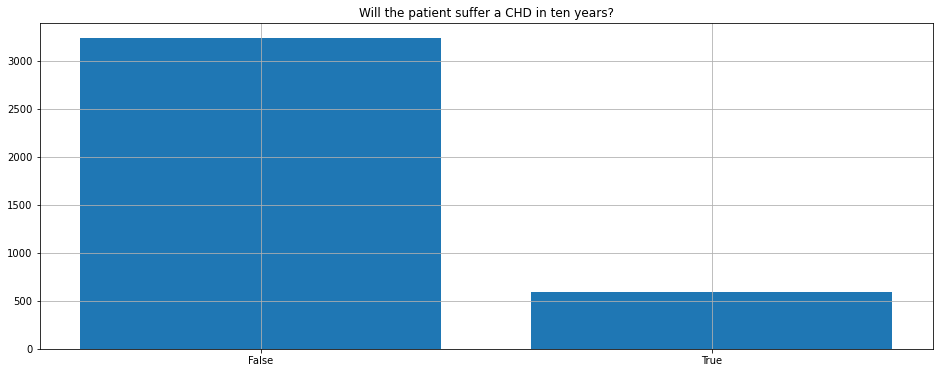

In [9]:
plt.figure(figsize=(16,6))
plt.title('Will the patient suffer a CHD in ten years?')
counts = framingham['TenYearCHD'].value_counts()
plt.bar(["False","True"],counts)
plt.grid()

<p>As the plot shows, this dataset is unbalanced. It is clearly shown that for each person that will have a CHD in ten years there are about 5 who won't. Obviously, this can be a problem, but it will be addressed in section 5, during the classification task.</p>

<h3>4.1.2 Sex and Age</h3>

<p>In this section, it will be put a focus on sex and age distributions.</p>

<p>Questions related to this section are:</p>

<ul>
    <li>Are there more female or male in the dataset?</li>
    <li>What is the distribution of ages of the dataset?</li>
    <li>And what about the distribution of ages of persons who will suffer a CHD?</li>
    <li>Are distribution of male and female alike?</li>
</ul>

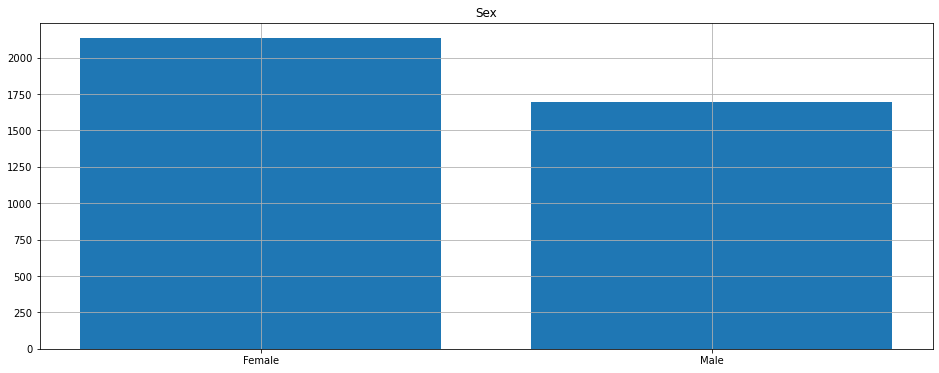

In [50]:
plt.figure(figsize=(16,6))
plt.title('Sex')
counts = framingham['sex'].value_counts()
plt.bar(["Female", "Male"],counts)
plt.grid()

<p>The female population of the dataset is higher slightly of the male population.</p>

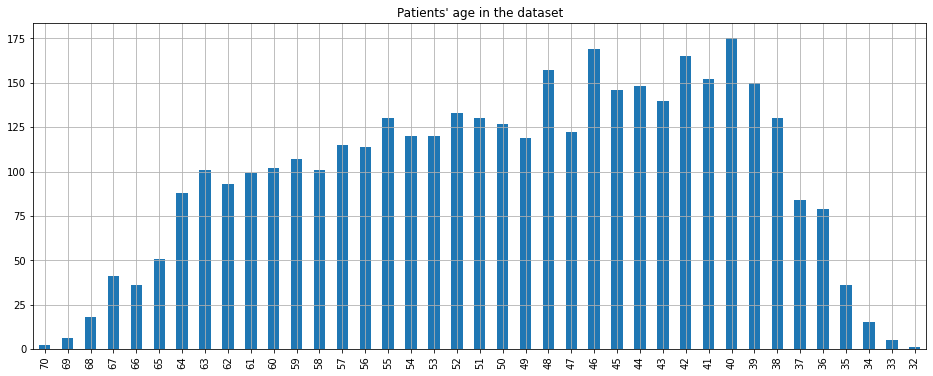

In [56]:
plt.figure(figsize=(16,6))
plt.title('Patients\' age in the dataset')
counts = framingham['age'].value_counts().sort_index(ascending=False).plot.bar()
plt.grid()

<p>The distribution of the patients' age is almost a gaussian: given a record from the dataset, the probability that it is of a very old person or a very young person is low.</p>

<p>Futhermore, this graphs tells another story: younger persons care of their health regarding CHDs. It is clear that CHDs are not only a problem concerning old persons, but it can depend from many different things and no one should underestimate this danger.</p>

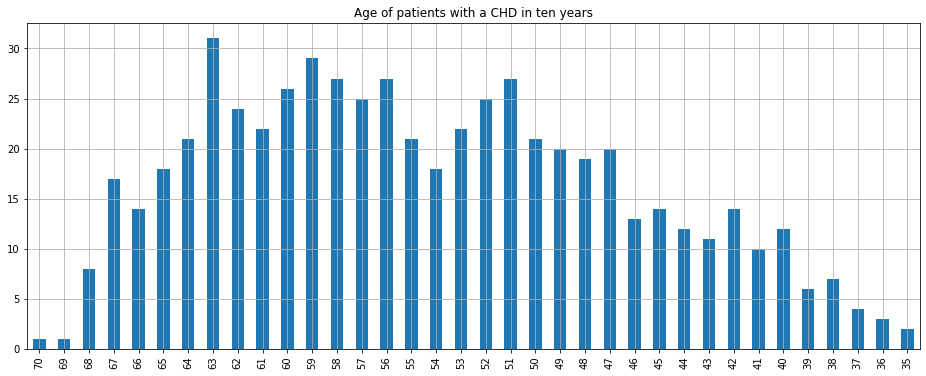

In [55]:
plt.figure(figsize=(16,6))
plt.title('Age of patients with a CHD in ten years')
counts = (framingham[framingham['TenYearCHD']==1])['age'].value_counts().sort_index(ascending=False).plot.bar()
plt.grid()

<p>This graph shows the age distribution of patients who will suffer of a CHD in 10 years (with no treatments).</p>

<p>As obvious as it is, older persons are more in danger and they will suffer of a CHD more likely than younger persons. But this graphs shows that younger people must not underestimate their health care.</p>

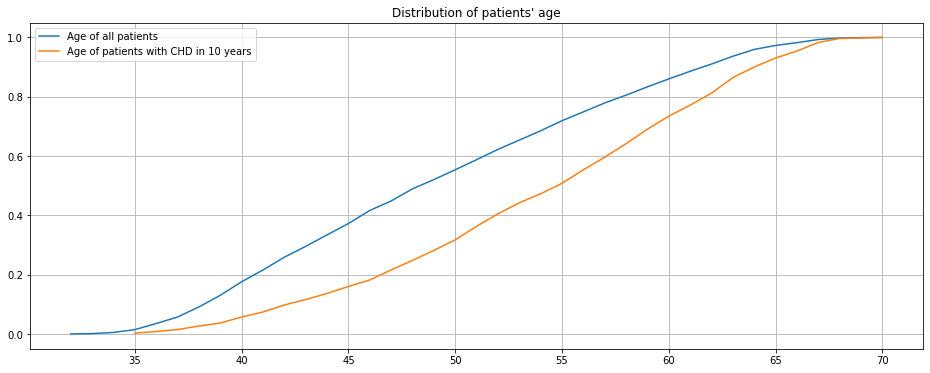

In [59]:
plt.figure(figsize=(16,6))
plt.title('Distribution of patients\' age')
cdf_all = framingham['age'].value_counts(normalize=True).sort_index(ascending=True).cumsum()
cdf_chd = (framingham[framingham['TenYearCHD']==1])['age'].value_counts(normalize=True).sort_index(ascending=True).cumsum()
plt.plot(cdf_all.index, cdf_all.values)
plt.plot(cdf_chd.index, cdf_chd.values)
plt.legend(["Age of all patients", "Age of patients with CHD in 10 years"])
plt.grid()

<p>The reason behind this graph was to show if the distribution of age of the dataset was similar to the distribution of the age of persons who will suffer a CHD in 10 year. It is clear that it is not the case: among persons who will have a CHD in 10 years, the majority is older than 50/55 years old. This won't surely surprise the reader, but it was still worth pointing out.</p>

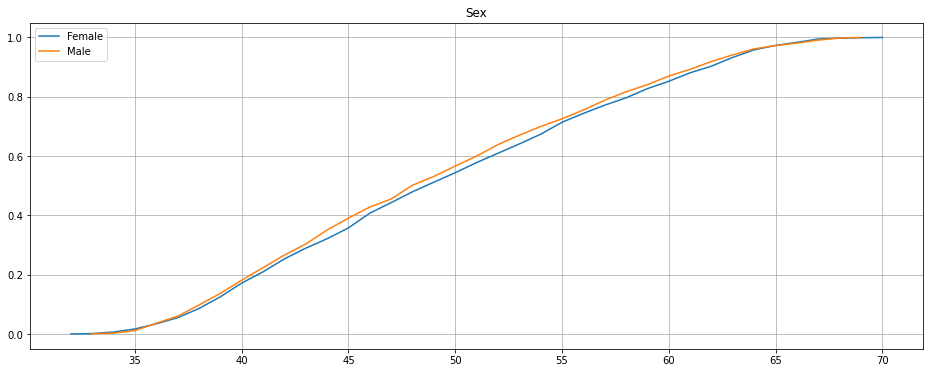

In [54]:
plt.figure(figsize=(16,6))
plt.title('Sex')
cdf_male = (framingham[framingham['sex']==1])['age'].value_counts(normalize=True).sort_index().cumsum()
cdf_female = (framingham[framingham['sex']==0])['age'].value_counts(normalize=True).sort_index().cumsum()
plt.plot(cdf_female.index, cdf_female.values)
plt.plot(cdf_male.index, cdf_male.values)
plt.legend(["Female", "Male"])
plt.grid()

<p>Distribution of age of persons in the dataset grouped by sex are similar. This is important, because it won't happen that a bias related to the sex of the patient can be introduced when proceding with classification tasks (or at least it will be less likely).</p>

<h3>4.1.3 Smokers</h3>

<p>Smokers are clearly more likely to suffer a CHD in their future, so it could be worth to study the data distribution of smokers (number of cigarettes, sex...). However, it is a lot interesting and fascinating the possibility to check if there exists any relations with being a smoker with other features. For instance, it could be interesting to see if being a smoker is related to the level of education or to the age. To clearify, it is not a relationship meant as corelation, but just a comparation with graphs.</p>

<p>It could be worth to recall the education feature for the reader. Patients in the dataset may have three different education labels, depending on whether they have an high school degree or not, or if they have a college degree.</p>

<p>It will be given an answer to the following questions:</p>

<ul>
    <li>How many smokers are there in the dataset?</li>
    <li>Do men smoke more than women?</li>
    <li>Can the level of education give information about the smokers?</li>
</ul>

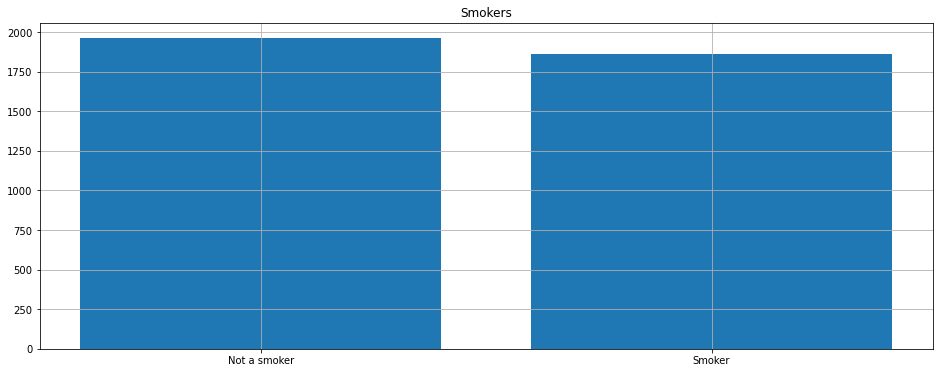

In [12]:
plt.figure(figsize=(16,6))
plt.title('Smokers')
counts = framingham['currentSmoker'].value_counts()
plt.bar(["Not a smoker", "Smoker"],counts)
plt.grid()

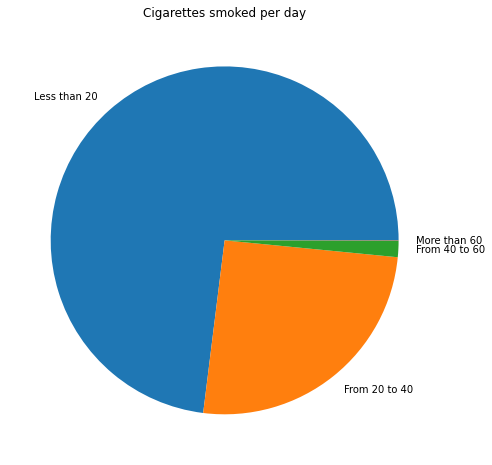

In [82]:
# Number of cigarettes smoked per day
counts = [0,0,0,0]

# Create 4 bins with width of 20
counts[0]=len((framingham[framingham['cigsPerDay']<20]))
counts[1]=len(framingham[(framingham['cigsPerDay']>=20)&(framingham['cigsPerDay']<40)])  
counts[2]=len(framingham[(framingham['cigsPerDay']>40)&(framingham['cigsPerDay']<60)])  
counts[3]=len(framingham[(framingham['cigsPerDay']>60)])


plt.figure(figsize=(16,8))
plt.title('Cigarettes smoked per day')
plt.pie(counts, labels=['Less than 20','From 20 to 40','From 40 to 60','More than 60'])
plt.show()

<p>Among the dataset smokers are the majority, but not by far. It is almost a 50%/50% scenario. In any case, the majority of the patients smoke less than 20 cigarettes. It could be possible to say that almost all the patients smoke less than 40 cigarettes a day. Only a couple of them smoke more than 40 ("luckily", someone would say).</p>

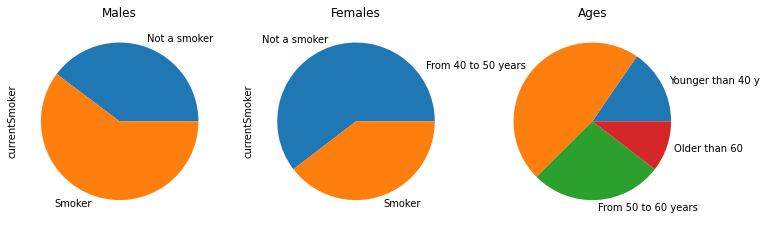

In [80]:
# Smokers/No-Smokers who are male
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.title('Males')
(framingham[framingham['sex']==1]).groupby('currentSmoker')['currentSmoker'].value_counts().plot.pie(labels=["Not a smoker","Smoker"])

# Smokers/No-Smokers who are female
plt.subplot(1,3,2)
plt.title('Females')
(framingham[framingham['sex']==0]).groupby('currentSmoker')['currentSmoker'].value_counts().plot.pie(labels=["Not a smoker","Smoker"])

# Smokers/No-Smokers by age

# Number of smokers grouped by age
counts = [0,0,0,0]

# Create 4 bins with width of 20
counts[0]=len(framingham[(framingham['currentSmoker']==1)&(framingham['age']<40)])
counts[1]=len(framingham[(framingham['currentSmoker']==1)&(framingham['age']>=40)&(framingham['age']<50)])  
counts[2]=len(framingham[(framingham['currentSmoker']==1)&(framingham['age']>=50)&(framingham['age']<60)])  
counts[3]=len(framingham[(framingham['currentSmoker']==1)&(framingham['age']>=60)])
                                                        
                                                        
plt.subplot(1,3,3)
plt.title('Ages')
plt.pie(counts, labels=['Younger than 40 y','From 40 to 50 years','From 50 to 60 years','Older than 60'])
plt.show()

<p>These graphs show an interesting fact: males smoke more than females. This could be due to cultural habits. For instance, in the past in many countries smoking was a sign to have become an adult man. In anycase, this report wants to be as much scientific as possible so the previous sentence must not be taken as the only reason for this difference, but it can be a clear example of why cultural habits can explain it.</p>

<p>Older people tend to smoke more than younger people. It is interesting to see that almost 50% of the smokers are 40/50 years old.</p>

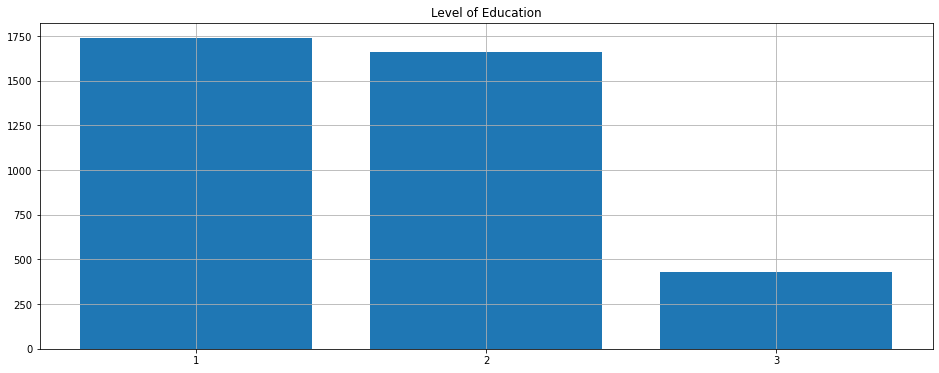

In [11]:
plt.figure(figsize=(16,6))
plt.title('Level of Education')
counts = framingham['education'].value_counts()
plt.bar(["1", "2", "3"],counts)
plt.grid()

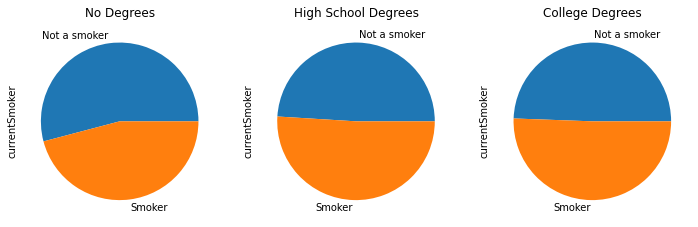

In [17]:
# Smokers/No-Smokers with no high school degress
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.title('No Degrees')
(framingham[framingham['education']==1]).groupby('currentSmoker')['currentSmoker'].value_counts().plot.pie(labels=["Not a smoker","Smoker"])

# Smokers/No-Smokers with an high school degress
plt.subplot(1,3,2)
plt.title('High School Degrees')
(framingham[framingham['education']==2]).groupby('currentSmoker')['currentSmoker'].value_counts().plot.pie(labels=["Not a smoker","Smoker"])

# Smokers/No-Smokers with a college degress
plt.subplot(1,3,3)
plt.title('College Degrees')
(framingham[framingham['education']==3]).groupby('currentSmoker')['currentSmoker'].value_counts().plot.pie(labels=["Not a smoker","Smoker"])
plt.show()

<p>Differently from the sex and the age, education doesn't seem so related with being a smoker.</p>

<h1>5 Classification</h1>